## Importing the necessary modules.

In [17]:
# To use stack function.
import numpy as np 

# To create the convolution neural network
import keras 


# To provide with the name of the images.
import glob

# To read rgb values of images.
import cv2

# To resize images.
from resizeimage import resizeimage
import numpy as np

# To open the image so it can be resized.
from PIL import Image

# To display images
import matplotlib.pyplot as plt
%matplotlib inline

## Resizing the images.

In [27]:
x=[]
y=[]

# Converting the daisy images to 100x100 pixels.

daisy_images=glob.glob('flowers/daisy/*.jpg')

i=1 
for image in daisy_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('flowers/daisy_100x100/'+str(i)+'.jpg')
    i=i+1
   
# Converting dandelion images to 100x100 pixels.   

dandelion_images=glob.glob('flowers/dandelion/*.jpg')

i=1 
for image in dandelion_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('flowers/dandelion_100x100/'+str(i)+'.jpg')
    i=i+1
    
# Converting rose images to 100x100 pixels.  

rose_images=glob.glob('flowers/rose/*.jpg')

i=1 
for image in rose_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('flowers/rose_100x100/'+str(i)+'.jpg')
    i=i+1    
    
# Converting sunflower images to 100x100 pixels.   

sunflower_images=glob.glob('flowers/sunflower/*.jpg')

i=1 
for image in sunflower_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('flowers/sunflower_100x100/'+str(i)+'.jpg')
    i=i+1

# Converting tulip images to 100x100 pixels.    
    
tulip_images=glob.glob('flowers/tulip/*.jpg')

i=1 
for image in tulip_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('flowers/tulip_100x100/'+str(i)+'.jpg')
    i=i+1    


## Opening the resized images.

In [29]:
# Opening images (This cell will only be functional only if
# the images have been rescaled to and saved in the folders of the same name)

x=[]
y=[]

# Opening the daisy images and storing the rgb values in a list

daisy_images_100x100=glob.glob('flowers/daisy_100x100/*.jpg')

i=1 
for image in daisy_images_100x100 :
    img=cv2.imread('flowers/daisy_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(0)
    i=i+1
   
# Opening the dandelion images and storing the rgb values in a list  

dandelion_images_100x100=glob.glob('flowers/dandelion_100x100/*.jpg')

i=1 
for image in dandelion_images_100x100 :
    img=cv2.imread('flowers/dandelion_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(1)
    i=i+1
    
# Opening the daisy images and storing the rgb values in a list   

rose_images_100x100=glob.glob('flowers/rose_100x100/*.jpg')

i=1 
for image in rose_images_100x100 :
    img=cv2.imread('flowers/rose_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(2)
    i=i+1    
    
# Opening the daisy images and storing the rgb values in a list   

sunflower_images_100x100=glob.glob('flowers/sunflower_100x100/*.jpg')

i=1 
for image in sunflower_images_100x100 :
    img=cv2.imread('flowers/sunflower_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(3)
    i=i+1

# Opening the daisy images and storing the rgb values in a list    
    
tulip_images_100x100=glob.glob('flowers/tulip_100x100/*.jpg')

i=1 
for image in tulip_images_100x100 :
    img=cv2.imread('flowers/tulip_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(4)
    i=i+1    


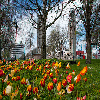

In [30]:
new_image

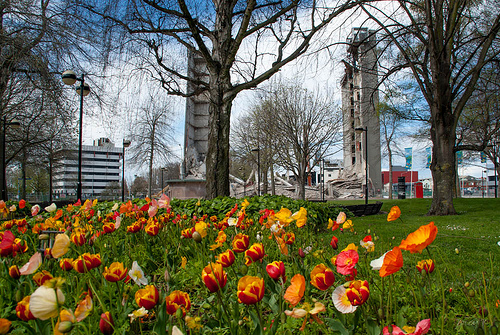

In [31]:
open_image

In [32]:
x

[array([[[145, 143, 143],
         [146, 144, 144],
         [148, 146, 146],
         ...,
         [153, 152, 154],
         [149, 148, 150],
         [156, 155, 157]],
 
        [[133, 133, 133],
         [139, 139, 139],
         [150, 148, 148],
         ...,
         [155, 154, 156],
         [152, 151, 153],
         [154, 153, 155]],
 
        [[129, 131, 131],
         [139, 139, 139],
         [151, 151, 151],
         ...,
         [157, 156, 158],
         [153, 152, 154],
         [147, 146, 148]],
 
        ...,
 
        [[ 20,  42,  40],
         [ 25,  46,  44],
         [ 28,  46,  45],
         ...,
         [126, 127, 131],
         [123, 124, 128],
         [122, 123, 127]],
 
        [[ 22,  44,  42],
         [ 27,  48,  46],
         [ 29,  47,  46],
         ...,
         [127, 128, 132],
         [125, 126, 130],
         [124, 125, 129]],
 
        [[ 23,  45,  43],
         [ 29,  50,  48],
         [ 31,  49,  48],
         ...,
         [129, 130, 134],
  

In [35]:
# OneHotEncoding the labels

y=keras.utils.to_categorical(y)

## Creating the model.

In [36]:
# Defining the neural network

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

nn=Sequential()

nn.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(100, 100, 3)))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=2))
#nn.add(Dropout(0.3))
nn.add(Flatten())
nn.add(Dense(500, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(5, activation='softmax'))

nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
__________

## Compiling the model.

In [37]:
# Compiling the model

nn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [38]:
type(x)

list

In [39]:
x[0].shape

(100, 100, 3)

In [40]:
y.shape

(4323, 5)

In [41]:
x_new=np.stack(x,axis=0)
x_new

array([[[[145, 143, 143],
         [146, 144, 144],
         [148, 146, 146],
         ...,
         [153, 152, 154],
         [149, 148, 150],
         [156, 155, 157]],

        [[133, 133, 133],
         [139, 139, 139],
         [150, 148, 148],
         ...,
         [155, 154, 156],
         [152, 151, 153],
         [154, 153, 155]],

        [[129, 131, 131],
         [139, 139, 139],
         [151, 151, 151],
         ...,
         [157, 156, 158],
         [153, 152, 154],
         [147, 146, 148]],

        ...,

        [[ 20,  42,  40],
         [ 25,  46,  44],
         [ 28,  46,  45],
         ...,
         [126, 127, 131],
         [123, 124, 128],
         [122, 123, 127]],

        [[ 22,  44,  42],
         [ 27,  48,  46],
         [ 29,  47,  46],
         ...,
         [127, 128, 132],
         [125, 126, 130],
         [124, 125, 129]],

        [[ 23,  45,  43],
         [ 29,  50,  48],
         [ 31,  49,  48],
         ...,
         [129, 130, 134],
        

In [42]:
x_new=x_new/255

In [43]:
x_new

array([[[[0.56862745, 0.56078431, 0.56078431],
         [0.57254902, 0.56470588, 0.56470588],
         [0.58039216, 0.57254902, 0.57254902],
         ...,
         [0.6       , 0.59607843, 0.60392157],
         [0.58431373, 0.58039216, 0.58823529],
         [0.61176471, 0.60784314, 0.61568627]],

        [[0.52156863, 0.52156863, 0.52156863],
         [0.54509804, 0.54509804, 0.54509804],
         [0.58823529, 0.58039216, 0.58039216],
         ...,
         [0.60784314, 0.60392157, 0.61176471],
         [0.59607843, 0.59215686, 0.6       ],
         [0.60392157, 0.6       , 0.60784314]],

        [[0.50588235, 0.51372549, 0.51372549],
         [0.54509804, 0.54509804, 0.54509804],
         [0.59215686, 0.59215686, 0.59215686],
         ...,
         [0.61568627, 0.61176471, 0.61960784],
         [0.6       , 0.59607843, 0.60392157],
         [0.57647059, 0.57254902, 0.58039216]],

        ...,

        [[0.07843137, 0.16470588, 0.15686275],
         [0.09803922, 0.18039216, 0.17254902]

In [44]:
# Creating training and testing dataset

from sklearn.model_selection import train_test_split
# Changed x --> x_new
x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=0.3,random_state=42)


In [45]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [46]:
type(x_train)

numpy.ndarray

In [47]:
x_train

array([[[[0.0745098 , 0.14901961, 0.17647059],
         [0.14509804, 0.23137255, 0.25490196],
         [0.1254902 , 0.23921569, 0.25882353],
         ...,
         [0.14117647, 0.21176471, 0.3254902 ],
         [0.12156863, 0.17647059, 0.28627451],
         [0.1254902 , 0.16862745, 0.2745098 ]],

        [[0.0745098 , 0.14509804, 0.17254902],
         [0.14117647, 0.22745098, 0.25098039],
         [0.15294118, 0.25490196, 0.27843137],
         ...,
         [0.10588235, 0.16470588, 0.26666667],
         [0.09411765, 0.14901961, 0.23921569],
         [0.10196078, 0.14509804, 0.23137255]],

        [[0.07843137, 0.14117647, 0.16862745],
         [0.14509804, 0.21960784, 0.24705882],
         [0.2       , 0.29411765, 0.31764706],
         ...,
         [0.10196078, 0.15294118, 0.23921569],
         [0.10980392, 0.15294118, 0.23137255],
         [0.11764706, 0.14509804, 0.21960784]],

        ...,

        [[0.65882353, 0.65098039, 0.37254902],
         [0.65882353, 0.65098039, 0.37254902]

In [48]:
x_train.shape

(3026, 100, 100, 3)

In [49]:
y_train.shape

(3026, 5)

In [50]:
x_test.shape

(1297, 100, 100, 3)

In [51]:
# Training the neural network

from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = nn.fit(x_train, y_train, batch_size=64
              , epochs=10,validation_data=(x_test,y_test), callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 3026 samples, validate on 1297 samples
Epoch 1/10
 - 286s - loss: 1.4381 - acc: 0.3764 - val_loss: 1.2201 - val_acc: 0.4834

Epoch 00001: val_loss improved from inf to 1.22011, saving model to model.weights.best.hdf5
Epoch 2/10
 - 168s - loss: 1.1053 - acc: 0.5360 - val_loss: 1.0552 - val_acc: 0.5667

Epoch 00002: val_loss improved from 1.22011 to 1.05515, saving model to model.weights.best.hdf5
Epoch 3/10
 - 171s - loss: 0.9690 - acc: 0.6262 - val_loss: 0.9502 - val_acc: 0.6338

Epoch 00003: val_loss improved from 1.05515 to 0.95024, saving model to model.weights.best.hdf5
Epoch 4/10
 - 162s - loss: 0.8699 - acc: 0.6662 - val_loss: 1.0103 - val_acc: 0.6006

Epoch 00004: val_loss did not improve from 0.95024
Epoch 5/10
 - 162s - loss: 0.7850 - acc: 0.7006 - val_loss: 0.8978 - val_acc: 0.6615

Epoch 00005: val_loss improved from 0.95024 to 0.89784, saving model to model.weights.best.hdf5
Epoch 6/10
 - 163s - loss: 0.6937 - acc: 0.7383 - val_loss: 0.8854 - val_acc: 0.6677

Epoch

In [52]:
# load the weights that yielded the best validation accuracy
nn.load_weights('model.weights.best.hdf5')

In [53]:
# evaluate and print test accuracy
score = nn.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6676946800538183


In [54]:
# get predictions on the test set
y_hat = nn.predict(x_test)

labels=['Daisy','Dandelion','Rose','Sunflower','Tulip']

In [55]:
y_hat

array([[1.6722499e-01, 8.0285794e-01, 1.5982378e-02, 7.0270556e-03,
        6.9075963e-03],
       [4.4253681e-02, 3.2546994e-01, 3.8964283e-02, 4.5585632e-01,
        1.3545571e-01],
       [3.0236778e-01, 1.8979448e-01, 3.0259627e-01, 2.5720637e-02,
        1.7952080e-01],
       ...,
       [2.0696077e-01, 5.1988417e-01, 1.3657877e-01, 7.4753620e-02,
        6.1822716e-02],
       [2.9587152e-03, 8.1189217e-05, 4.5254853e-01, 3.9665017e-02,
        5.0474656e-01],
       [3.9162818e-02, 7.9012401e-03, 4.8586535e-01, 5.6200571e-02,
        4.1087002e-01]], dtype=float32)

In [56]:
x_test.shape

(1297, 100, 100, 3)

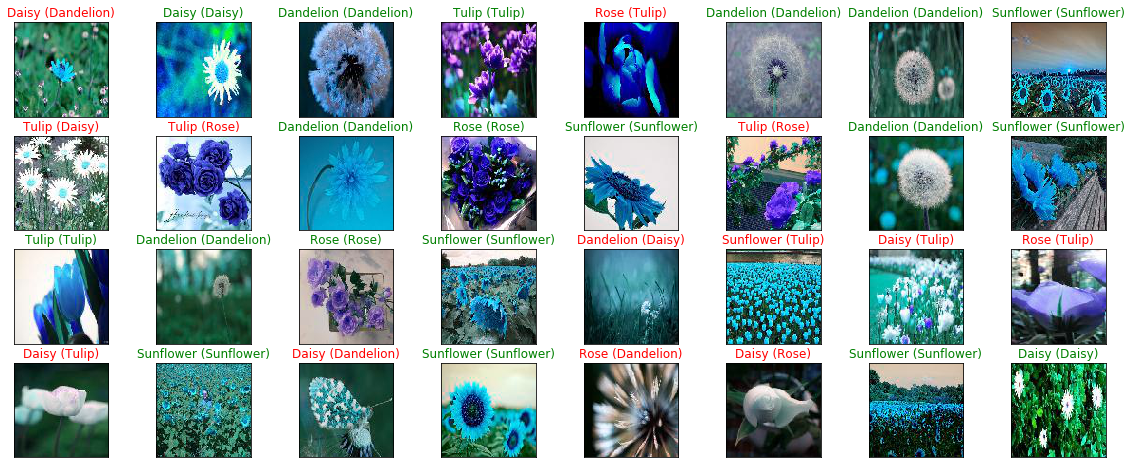

In [57]:
# plot a random sample of test images, their predicted labels, and ground truth
fig=plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)) :
    ax=fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx=np.argmax(y_hat[idx])
    true_idx=np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),color=("green" if pred_idx == true_idx else "red"))

### Testing the model on images from the internet.
   All the images are downloaded from Google Images, Each image 

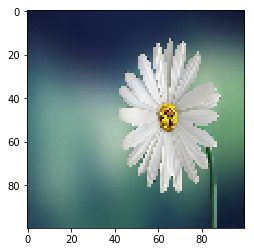

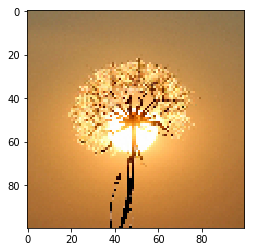

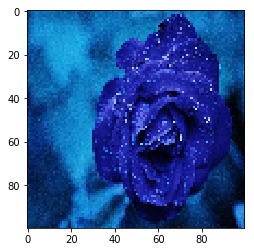

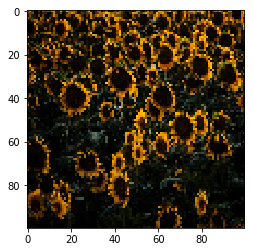

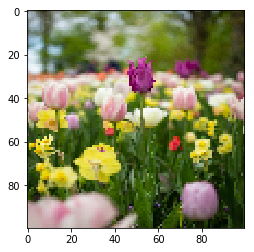

In [63]:
test_images=[]

open_image=Image.open('daisy_image_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('dandelion_image_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('rose_image_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('sunflower_image_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('tulip_image_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

test_features=np.stack(test_images)
test_features=test_features/255
y_pred=nn.predict(test_features)

for ab in range(5) :
    plt.imshow(test_images[ab])
    plt.show()    

In [64]:
# Predicted labels for the test images downloaded from the internet.
# Actual labels : Daisy, Dandelion, Rose, Sunflower, Tulip

for ab in range(5) :
    print(labels[np.argmax(y_pred[ab])])

Dandelion
Dandelion
Rose
Dandelion
Daisy
